# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [1]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [2]:
# Simulate data
visitors_A = 1000
clicks_A = 150
visitors_B = 1050
clicks_B = 180

In [3]:
non_clicks_A = visitors_A - clicks_A
non_clicks_B = visitors_B - clicks_B

data = pd.DataFrame({
    'Version': ['A', 'B'],
    'Visitors': [visitors_A, visitors_B],
    'Clicks': [clicks_A, clicks_B],
    'Non_Clicks': [non_clicks_A, non_clicks_B]})

# Contingency table
contingency_table = np.array([[clicks_A, non_clicks_A],[clicks_B, non_clicks_B]])
contingency_table

array([[150, 850],
       [180, 870]])

In [8]:
data

,Version,Visitors,Clicks,Non_Clicks
0,A,1000,150,850
1,B,1050,180,870


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [4]:
# Null Hypothesis (H₀): `#TODO`.
# Alternative Hypothesis `#TODO`.



- Run the Test

In [5]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
p_value

0.2078538852337412

> Interpret Results

In [6]:
alpha = 0.05
if p_value < alpha:
    conclusion = "Statistically significant difference in CTR between Version A and B."
else:
    conclusion = "No statistically significant difference in CTR between Version A and B."

📈 Visualization

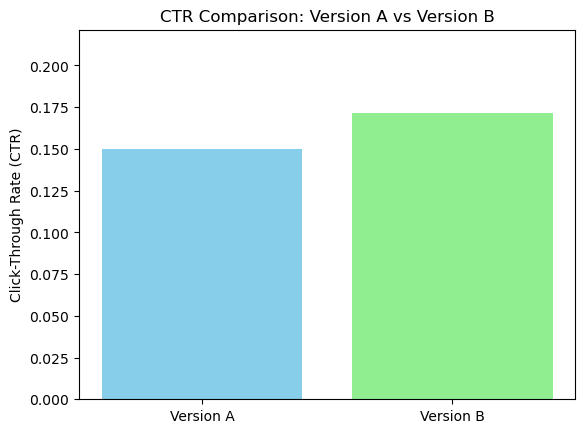

Chi-Square Statistic: 1.586311673629987
p-value: 0.2078538852337412
CTR A: 0.15
CTR B: 0.1714
Conclusion: No statistically significant difference in CTR between Version A and B.


In [7]:
ctr_A = clicks_A / visitors_A
ctr_B = clicks_B / visitors_B

plt.bar(['Version A', 'Version B'], [ctr_A, ctr_B], color=['skyblue', 'lightgreen'])
plt.ylabel('Click-Through Rate (CTR)')
plt.title('CTR Comparison: Version A vs Version B')
plt.ylim(0, max(ctr_A, ctr_B) + 0.05)
plt.show()

# --------------------------
# 5. Output Results
# --------------------------
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)
print("CTR A:", round(ctr_A, 4))
print("CTR B:", round(ctr_B, 4))
print("Conclusion:", conclusion)


## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [2]:
### Import Libraries

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [16]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("https://raw.githubusercontent.com/RamiSaad93/lab-intro-to-ab-testing/refs/heads/main/your-code/data/marketing_AB.csv")
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [21]:
data.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [18]:
data['test group'].value_counts()

ad     564577
psa     23524
Name: test group, dtype: int64

In [24]:
group_a_converted = len(data[(data["test group"] == 'psa') & (data["converted"] == True)])
group_a_converted

420

In [28]:
total_a_count = len(data[(data["test group"] == 'psa')])
total_a_count

23524

In [25]:
group_b_converted = len(data[(data["test group"] == 'ad') & (data["converted"] == True)])
group_b_converted

14423

In [30]:
total_b_count = len(data[(data["test group"] == 'ad')])
total_b_count                          

564577

📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [20]:
# test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
# converted: If a person bought the product then True, else is False
# total ads: Amount of ads seen by person

In [31]:
# TODO
conversion_rate_a = group_a_converted / total_a_count
conversion_rate_b = group_b_converted / total_b_count

conversion_rate_a, conversion_rate_b

(0.01785410644448223, 0.025546559636683747)

> Statistical Test

In [37]:
from statsmodels.stats.proportion import proportions_ztest

counts = [group_b_converted, group_a_converted]
nobs = [total_b_count, total_a_count]

z_score, pvalue = proportions_ztest(counts, nobs, alternative='two-sided')
pvalue

1.7052807161559727e-13

In [38]:
z_score, pvalue = proportions_ztest(counts, nobs, alternative='larger')
pvalue

8.526403580779863e-14

In [39]:
# Because pvalue < alpha: There is a statistical significance between a and b

#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [ ]:
# TODO
# Insert your code HERE

>Visualize Resultsm

In [ ]:
# TODO
# Insert your code HERE

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [ ]:
# Import Libraries

In [ ]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [ ]:
# TODO
# Insert your code HERE

> Statistical Test

In [ ]:
# TODO
# Insert your code HERE

📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [ ]:
# TODO
# Insert your code HERE

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [ ]:
# TODO
# Insert your code HERE

Enjoy & Happy A/B Testing :) ......!